<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/ADCN_Resnet18_train1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 30.9 MB/s 
     |████████████████████████████████| 1.3 MB 85.8 MB/s 
     |████████████████████████████████| 451 kB 79.0 MB/s 
     |████████████████████████████████| 5.8 MB 65.4 MB/s 
     |████████████████████████████████| 1.6 MB 64.3 MB/s 
     |████████████████████████████████| 132 kB 60.0 MB/s 
     |████████████████████████████████| 212 kB 93.6 MB/s 
     |████████████████████████████████| 182 kB 77.3 MB/s 
     |████████████████████████████████| 127 kB 77.9 MB/s 
     |████████████████████████████████| 7.6 MB 59.1 MB/s 
Mounted at /content/gdrive


In [2]:
!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 27.4 MB/s 


In [3]:
path=Path('/content/gdrive/MyDrive/ALZ-KONTROL/Train')

In [4]:
all_files= get_image_files(path)

In [5]:
from fastai.vision.augment import contrast
tfms = aug_transforms(size=512, 
                      min_scale=0.15,
                      do_flip=False,
                      flip_vert=False,
                      max_rotate=0,
                      max_warp=0,
                    
                      max_zoom=0.05,
                      max_lighting=0.70,
                      p_lighting=0.60
                      
                      )

In [6]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.1),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=tfms
)

In [7]:
dls= dblock.dataloaders(all_files)

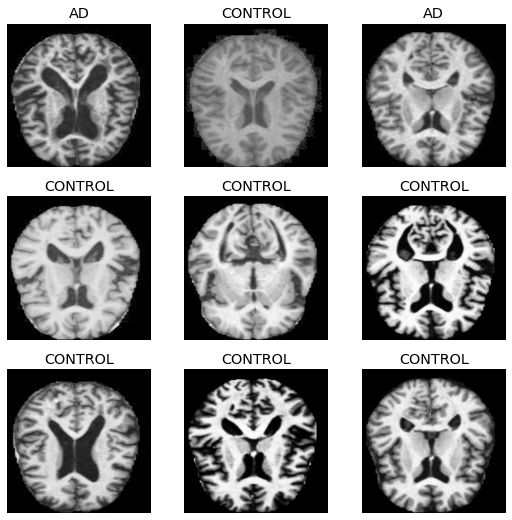

In [ ]:
dls.show_batch()

In [ ]:
print("Number of examples in testing:", len(dls.valid_ds))

Number of examples in testing: 557


In [8]:
learn = vision_learner(dls, resnet18,metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.005248074419796467)

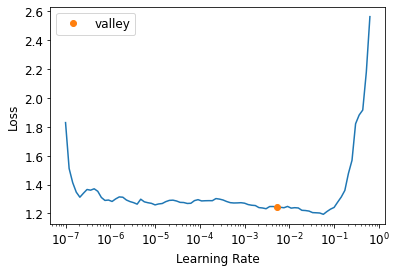

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100,1.2e-3)


epoch,train_loss,valid_loss,accuracy,time
0,1.158160,0.719819,0.639138,02:09
1,1.054639,0.697735,0.640934,01:16
2,1.032114,0.737083,0.633752,01:15
3,0.985116,0.634097,0.662478,01:15
4,0.913417,0.650530,0.685817,01:15
5,0.870040,0.710494,0.649910,01:15
6,0.828086,0.717236,0.633752,01:15
7,0.778013,0.662978,0.626571,01:15
8,0.765705,0.544690,0.703770,01:15
9,0.710472,0.533095,0.718133,01:15


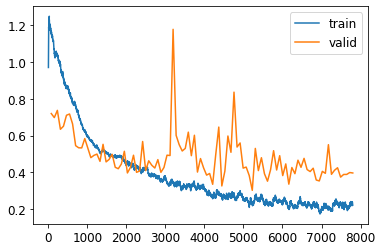

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save(path/'ADCN_resnet18_train1')

Path('/content/gdrive/MyDrive/ALZ-KONTROL/Train/ADCN_resnet18_train1.pth')

In [ ]:
learn.export(path/'ADCNResnet_18_train1.pkl')

In [9]:
learn = vision_learner(dls, resnet18,metrics=accuracy).load('/content/gdrive/MyDrive/ALZ-KONTROL/Train/ADCN_resnet18_train1')

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


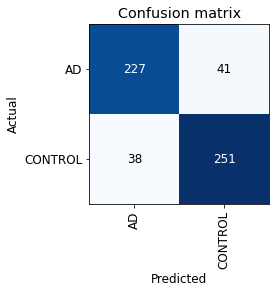

In [10]:
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()